# Effect of Handwashing
 Statistical analysis of the effect of handwashing policy on hospital death rates.
 
 
 We'll be using datasets collected by Dr. Ignaz Semmelweis, the discoverer of the benefits of handwashing. He presented this data to medical scientists without statistical arguments and visualisations (that was almost 200 years ago), and his discovery was rejected and ridiculed. We'll fix this now.

In 1840's, Dr. Semmelweis noticed the difference in death rates of women giving birth between two of the Vienna General Hospital's clinics:

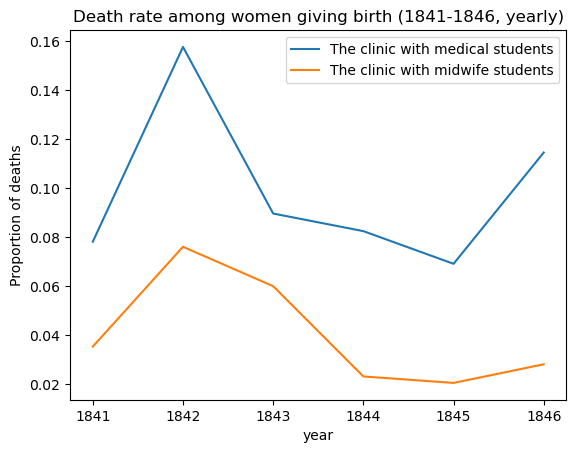

The average death rate for the clinic with medical students in 1841-1846 was 0.0985052720217127
The average death rate for the clinic with midwife students in 1841-1846 was 0.04039993689236435


In [32]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

# Compare yearly death rates in 2 clinics

yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

ax = clinic_1.plot(x='year', y='proportion_deaths', label='The clinic with medical students')
clinic_2.plot(x='year', y='proportion_deaths', label='The clinic with midwife students', ax=ax, ylabel='Proportion of deaths')
ax.set_title('Death rate among women giving birth (1841-1846, yearly)')
plt.show()
print("The average death rate for the clinic with medical students in 1841-1846 was " + str(clinic_1['proportion_deaths'].mean()))
print("The average death rate for the clinic with midwife students in 1841-1846 was " + str(clinic_2['proportion_deaths'].mean()))

The clinic, in which mostly medical students served, was consistently producing much higher death rates. 

While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. Dr. Semmelweis started to suspect that something on the corpses is spreading from the hands of the medical students, causing deadly childbed fever.

So Dr. Semmelweis made a new policy for the medical students: *Wash your hands before operations!*

The effects were so drastic, that we can see it in the monthly graph:

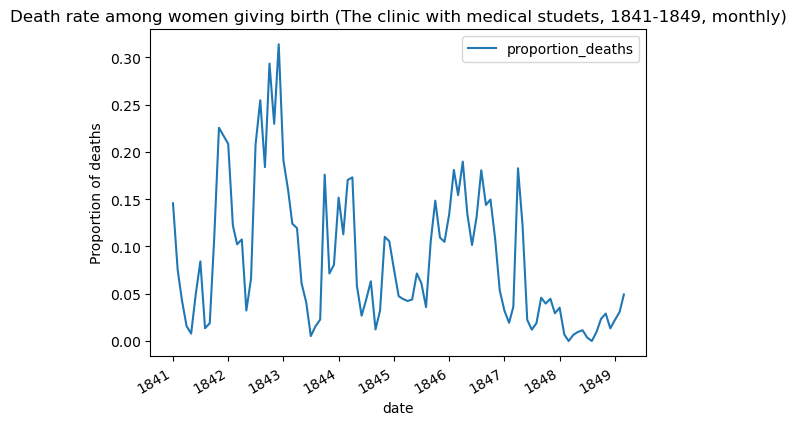

In [33]:
# Plot monthly proportion of deaths
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=["date"])
monthly["proportion_deaths"] = monthly['deaths'] / monthly['births']
ax = monthly.plot(x='date', y='proportion_deaths', ylabel='Proportion of deaths')
ax.set_title('Death rate among women giving birth (The clinic with medical studets, 1841-1849, monthly)')
plt.show()

As you can guess, Dr. Semmelweis made handwashing obligatory in 1847, namely, in June. Let's make it even more visually obvious:

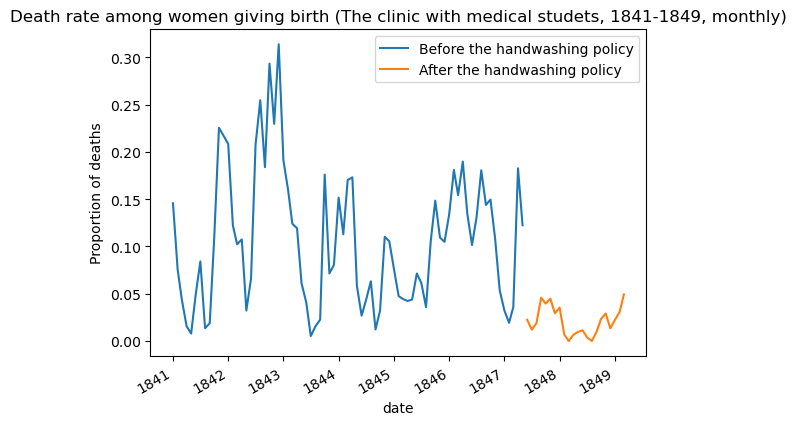

In [34]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot
ax = before_washing.plot(x='date', y='proportion_deaths', label='Before the handwashing policy')
after_washing.plot(x='date', y='proportion_deaths', label='After the handwashing policy', ax=ax, ylabel='Proportion of deaths')

ax.set_title('Death rate among women giving birth (The clinic with medical studets, 1841-1849, monthly)')
plt.show()

In [35]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
print("The average death rate before the handwashing policy was " + str(before_proportion.mean()))
print("The average death rate after the handwashing policy was " + str(after_proportion.mean()))
mean_diff = after_proportion.mean() - before_proportion.mean()
print("The change was " + str(mean_diff))

The average death rate before the handwashing policy was 0.10504998260908789
The average death rate after the handwashing policy was 0.021093375097254535
The change was -0.08395660751183336


As we can see, the new average death rate in the clinic with medical students (about 2%) is even lower than the average death rate in the clinic with midwife students that we calculated before (about 4%).

The average death rate dropped from 10.5% to 2%. Is this difference statistically significant?

The last observation is March 1849:

In [36]:
monthly.iloc[-1]

date                 1849-03-01 00:00:00
births                               406
deaths                                20
proportion_deaths               0.049261
Name: 97, dtype: object

Do we have enough observations? How likely that the drop in deaths is due to a fluctuation? 
Let's perform a bootstrap analysis: 

In [37]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101733
0.975   -0.067284
dtype: float64

Therefore, assuming the policy there were no other significant factors, the policy of obligatory handwashing implemented by Dr. Semmelweis reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. 